Train data shape: (92, 3, 1)
Test data shape: (44, 3, 1)


Epoch 1/100

92/92 - 2s - loss: 0.0243 - 2s/epoch - 22ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0095 - 119ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0076 - 119ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0064 - 112ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0056 - 117ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0050 - 120ms/epoch - 1ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0045 - 163ms/epoch - 2ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0041 - 187ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0040 - 105ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0038 - 109ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0039 - 99ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0039 - 106ms/epoch - 1ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0037 - 150ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0038 - 124ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0036 - 136ms/epoch - 1

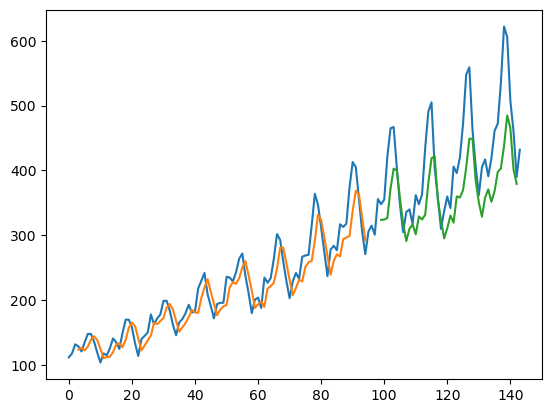

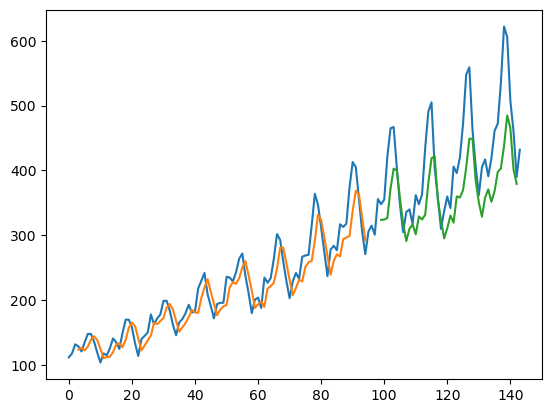

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
# look_back: number of previous steps
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("Train data shape:", trainX.shape)
print("Test data shape:", testX.shape)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
input_shape=(trainX.shape[1], trainX.shape[2])


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainPredict[:] = np.nan_to_num(trainPredict)
testPredict[:] = np.nan_to_num(testPredict)
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
print("Test Score: %.2f RMSE" % (testScore))


# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [3]:
look_back_values = [1, 3, 5]
for look_back in look_back_values:
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    model = Sequential()
    model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

    print("Look Back:", look_back)
    print("Train Score: %.2f RMSE" % (trainScore))
    print("Test Score: %.2f RMSE" % (testScore))


2/2 [==============================] - 0s 2ms/step
Look Back: 1
Train Score: 22.84 RMSE
Test Score: 49.13 RMSE
2/2 [==============================] - 0s 3ms/step
Look Back: 3
Train Score: 21.88 RMSE
Test Score: 51.09 RMSE
2/2 [==============================] - 0s 1ms/step
Look Back: 5
Train Score: 24.34 RMSE
Test Score: 53.56 RMSE


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
# look_back: number of previous steps
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("Train data shape:", trainX.shape)
print("Test data shape:", testX.shape)


# Adding another LSTM layer
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print("Train Score: %.2f RMSE" % (trainScore))
print("Test Score: %.2f RMSE" % (testScore))


Train data shape: (92, 3, 1)
Test data shape: (44, 3, 1)
2/2 [==============================] - 0s 3ms/step
Train Score: 26.81 RMSE
Test Score: 69.56 RMSE


In [5]:
# import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vecor_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# You can change epochs
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


17464789/17464789 [==============================] - 1s 0us/step
X_train shape: (25000, 500)
X_test shape: (25000, 500)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm_6 (LSTM)               (None, 100)               53200     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5

391/391 [==============================] - 116s 291ms/step - loss: 0.4479 - accuracy: 0.7844
Epoch 2/5
391/391 [==============================

In [6]:


# import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vecor_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# You can change epochs
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



X_train shape: (25000, 500)
X_test shape: (25000, 500)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_7 (LSTM)               (None, None, 100)         53200     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 293701 (1.12 MB)
Trainable params: 293701 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
391/391 [==============================] - 321s 815ms/step - loss: 0.6647 - accu

In [7]:


# import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vecor_length))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.25))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# You can change epochs
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



X_train shape: (25000, 500)
X_test shape: (25000, 500)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_9 (LSTM)               (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
391/391 [==============================] - 180s 455ms/step - loss: 0.5630 - 

In [8]:
  embedding_vecor_length_values = [16, 32, 64]
for emb_dim in embedding_vecor_length_values:
    model = Sequential()
    model.add(Embedding(input_dim=top_words, output_dim=emb_dim))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose=0)

    print("Embedding Dimension:", emb_dim)
    print("Accuracy: %.2f%%" % (scores[1]*100))


Embedding Dimension: 16
Accuracy: 87.48%
Embedding Dimension: 32
Accuracy: 86.19%
Embedding Dimension: 64
Accuracy: 87.27%
